## Day 32 Lecture 1 Assignment

In this assignment, we will learn about K nearest neighbor regression. We will use the absenteeism at work dataset loaded below and analyze the model generated for this dataset.

The meaning of the different columns can be found here: https://www.kaggle.com/tonypriyanka2913/employee-absenteeism

In [176]:
%matplotlib inline

import math

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [177]:
absent = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/Absenteeism_at_work.csv', sep=';')

In [178]:
absent.shape

(740, 21)

In [179]:
absent.dtypes

ID                                   int64
Reason for absence                   int64
Month of absence                     int64
Day of the week                      int64
Seasons                              int64
Transportation expense               int64
Distance from Residence to Work      int64
Service time                         int64
Age                                  int64
Work load Average/day              float64
Hit target                           int64
Disciplinary failure                 int64
Education                            int64
Son                                  int64
Social drinker                       int64
Social smoker                        int64
Pet                                  int64
Weight                               int64
Height                               int64
Body mass index                      int64
Absenteeism time in hours            int64
dtype: object

In [180]:
absent.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,97,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,97,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,97,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,2


Find which variables have the highest pairwise correlation and remove them from our dataset. Additionally, try to think of which variables are correlated by looking at the column names and remove those columns as well.

Note: When choosing between two categorical variables that are correlated, you often want to keep the one with fewer unique values. Why might that be? (Think about the cons of KNN.)

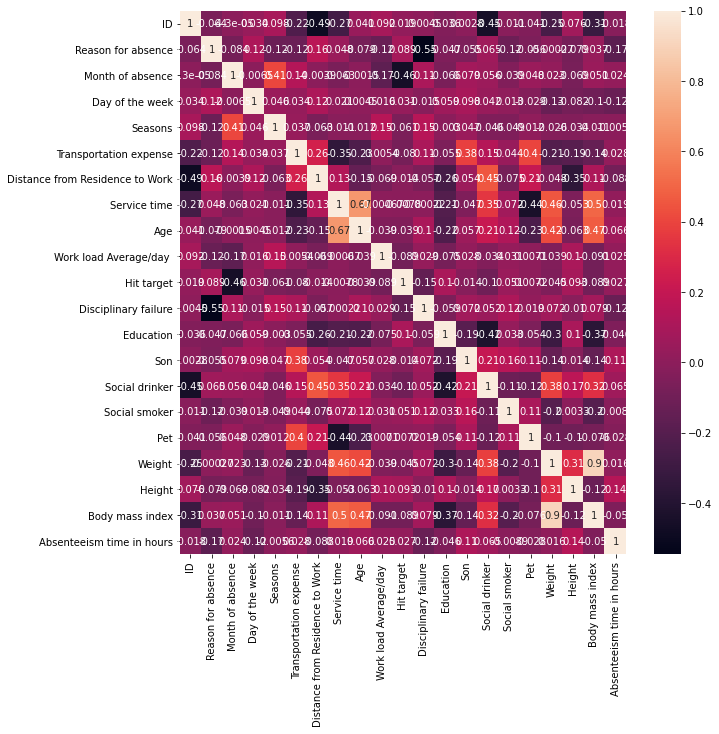

In [181]:
# answer below:

plt.figure(figsize = (10, 10))
sns.heatmap(absent.corr(), annot=True)
plt.show()

In [182]:
absent['Body mass index'].value_counts()

31    147
25    126
24     86
23     75
28     59
19     46
30     40
22     35
27     24
32     24
29     23
21     22
38     19
33      6
36      5
35      2
34      1
Name: Body mass index, dtype: int64

In [183]:
absent['Weight'].value_counts()

89     113
69      85
65      61
83      55
56      46
90      40
73      37
98      35
67      30
95      29
88      29
86      24
80      24
63      20
75      19
106     19
84      16
70      15
68      13
58       7
77       6
108      5
94       4
76       3
79       3
100      2
Name: Weight, dtype: int64

In [184]:
absent.shape

(740, 21)

In [185]:
absent.drop(columns='Weight', inplace=True)

In [186]:
absent.drop(columns='Month of absence', inplace=True)

In [187]:
#absent.drop(columns='ID', inplace=True)

In [188]:
absent.shape

(740, 19)

Figure out which columns actually contain sneaky categorical variables and turn those into dummy variables.

In [199]:
# answer below:
#absent.dtypes
categorical = absent.select_dtypes(include=['int64'])
for i in categorical:
    column = categorical[i]
    print(i)
    print({column.nunique()})


ID
{36}
Reason for absence
{28}
Transportation expense
{24}
Distance from Residence to Work
{25}
Service time
{18}
Age
{22}
Hit target
{13}
Height
{14}
Body mass index
{17}
Absenteeism time in hours
{19}


In [190]:
absent = pd.concat([absent,pd.get_dummies(absent['Day of the week'], prefix='Day', drop_first=True)], axis=1)
absent = pd.concat([absent,pd.get_dummies(absent['Seasons'], prefix='Season', drop_first=True)], axis=1)
absent = pd.concat([absent,pd.get_dummies(absent['Disciplinary failure'], prefix='Discipline', drop_first=True)], axis=1)
absent = pd.concat([absent,pd.get_dummies(absent['Education'], prefix='Education', drop_first=True)], axis=1)
absent = pd.concat([absent,pd.get_dummies(absent['Son'], prefix='Kids', drop_first=True)], axis=1)
absent = pd.concat([absent,pd.get_dummies(absent['Social drinker'], prefix='Drinker', drop_first=True)], axis=1)
absent = pd.concat([absent,pd.get_dummies(absent['Social smoker'], prefix='Smoker', drop_first=True)], axis=1)
absent = pd.concat([absent,pd.get_dummies(absent['Pet'], prefix='Pet', drop_first=True)], axis=1)


In [191]:
absent.drop(columns=['Day of the week', 'Seasons', 'Disciplinary failure', 'Education', 'Son', 'Social drinker', 'Social smoker', 'Pet'], inplace=True)

In [192]:
absent

,ID,Reason for absence,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Height,Body mass index,Absenteeism time in hours,Day_3,Day_4,Day_5,Day_6,Season_2,Season_3,Season_4,Discipline_1,Education_2,Education_3,Education_4,Kids_1,Kids_2,Kids_3,Kids_4,Drinker_1,Smoker_1,Pet_1,Pet_2,Pet_4,Pet_5,Pet_8
0,11,26,289,36,13,33,239.554,97,172,30,4,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0
1,36,0,118,13,18,50,239.554,97,178,31,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0
2,3,23,179,51,18,38,239.554,97,170,31,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,7,7,279,5,14,39,239.554,97,168,24,4,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0
4,11,23,289,36,13,33,239.554,97,172,30,2,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,11,14,289,36,13,33,264.604,93,172,30,8,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0
736,1,11,235,11,14,37,264.604,93,172,29,4,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0
737,4,0,118,14,13,40,271.219,95,170,34,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1
738,8,0,231,35,14,39,271.219,95,170,35,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0


Split the data into train and test with test containing 20% of the data, then scale your features.

In [204]:
# answer below:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X = absent.drop(columns='Absenteeism time in hours')
y = absent['Absenteeism time in hours']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
print("The number of observations in training set is {}".format(X_train.shape[0]))
print("The number of observations in test set is {}".format(X_test.shape[0]))

scale = MinMaxScaler()
X_train_sca = scale.fit_transform(X_train)
X_test_sca = scale.transform(X_test)


The number of observations in training set is 592
The number of observations in test set is 148


Train a series of KNN regression models with a range of K values. For each K value, use cross validation of the training set and find the average RMSE score. Make a plot of K versus average RMSE. What is the best value of K?

In [205]:
# answer below
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
#from sklearn.model_selection import cross_validate

rmse_train = []
rmse_test = []
k_list = range(1, 15, 2)
for i in k_list:
  abs = KNeighborsRegressor(n_neighbors=i)
  abs.fit(X_train_sca, y_train)
  #accuracy_train.append(neigh.score(X_train, y_train))
  #accuracy_test.append(neigh.score(X_test, y_test))
  #f1_train.append(f1_score(y_train, neigh.predict(X_train)))
  #f1_test.append(f1_score(y_test, neigh.predict(X_test)))
  y_pred_train = abs.predict(X_train_sca)
  rmse_train.append(mean_squared_error(y_train, y_pred_train, squared=False))
  y_pred_test = abs.predict(X_test_sca)
  rmse_test.append(mean_squared_error(y_test, y_pred_test, squared=False))


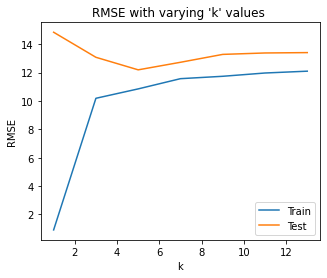

In [206]:
plt.figure(figsize=(5,4))
plt.plot(k_list, rmse_train, label='Train')
plt.plot(k_list, rmse_test, label='Test')
plt.title("RMSE with varying 'k' values ")
plt.xlabel('k')
plt.ylabel('RMSE')
plt.legend()
plt.show()

Using your best K, fit a model to all your training data and show the RMSE for the training and testing sets.

In [208]:
# answer 
abs1 = KNeighborsRegressor(n_neighbors=5)
abs1.fit(X_train_sca, y_train)

y_pred_train = abs1.predict(X_train_sca)
print('RMSE train: ', mean_squared_error(y_train, y_pred_train, squared=False))
y_pred_test = abs1.predict(X_test_sca)
print('RMSE test: ', mean_squared_error(y_test, y_pred_test, squared=False))

RMSE train:  10.854280510720432
RMSE test:  12.198748274288615


Create a homoscedasticity plot (also called residual plot). How is your model performing? What ideas do you have to improve the model?

In [197]:
# answer below

Mean of the errors in the absenteeism model is: -0.19594594594594572


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


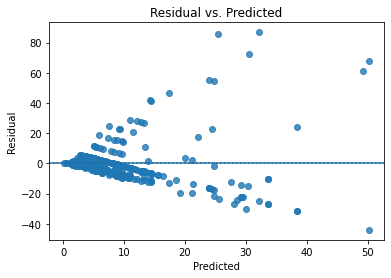

In [209]:
predictions = abs1.predict(X_train_sca)
errors = y_train - predictions

print("Mean of the errors in the absenteeism model is: {}".format(np.mean(errors)))

sns.residplot(predictions, errors)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()